In [13]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
import uproot

def get_branch_names(root_file_path):
    # Open the ROOT file
    with uproot.open(root_file_path) as file:
        # Find the first TTree in the file
        tree_name = None
        for key in file.keys():
            if isinstance(file[key], uproot.behaviors.TTree.TTree):
                tree_name = key
                break

        if tree_name is None:
            print("No TTree found in the file.")
            return

        # Open the TTree
        tree = file[tree_name]
        
        # Get branch names
        branch_names = tree.keys()
        
        # Print branch names
        for name in branch_names:
            print(name)

# Specify the ROOT file path
root_file_path = "/users/zw21147/ResearchProject/datasets/split/combinatorial_select_Kuu_renamed.root"

# Call the function
get_branch_names(root_file_path)


MOTHER_vtxX
MOTHER_vtxY
MOTHER_vtxZ
MOTHER_vtxXERR
MOTHER_vtxYERR
MOTHER_vtxZERR
MOTHER_ENDVERTEX_CHI2
MOTHER_ENDVERTEX_NDOF
MOTHER_ENDVERTEX_COV_
MOTHER_OWNPV_X
MOTHER_OWNPV_Y
MOTHER_OWNPV_Z
MOTHER_OWNPV_XERR
MOTHER_OWNPV_YERR
MOTHER_OWNPV_ZERR
MOTHER_OWNPV_COV_
MOTHER_IPCHI2_OWNPV
MOTHER_FDCHI2_OWNPV
MOTHER_DIRA_OWNPV
MOTHER_PX
MOTHER_PY
MOTHER_PZ
MOTHER_BKGCAT
MOTHER_TRUEID
MOTHER_nNegative_stable
MOTHER_nPositive_stable
MOTHER_MC_MOTHER_ID
MOTHER_MC_GD_MOTHER_ID
MOTHER_MC_GD_GD_MOTHER_ID
MOTHER_PX_TRUE
MOTHER_PY_TRUE
MOTHER_PZ_TRUE
MOTHER_origX_TRUE
MOTHER_origY_TRUE
MOTHER_origZ_TRUE
MOTHER_vtxX_TRUE
MOTHER_vtxY_TRUE
MOTHER_vtxZ_TRUE
MOTHER_cpt_0.70
MOTHER_cp_0.70
MOTHER_cmult_0.70
MOTHER_SmallestDeltaChi2OneTrack
MOTHER_SmallestDeltaChi2TwoTracks
MOTHER_VTXISOBDTHARDFIRSTVALUE
MOTHER_VTXISOBDTHARDSECONDVALUE
MOTHER_VTXISOBDTHARDTHIRDVALUE
INTERMEDIATE_vtxX
INTERMEDIATE_vtxY
INTERMEDIATE_vtxZ
INTERMEDIATE_vtxXERR
INTERMEDIATE_vtxYERR
INTERMEDIATE_vtxZERR
INTERMEDIATE_ENDVERTEX_CHI

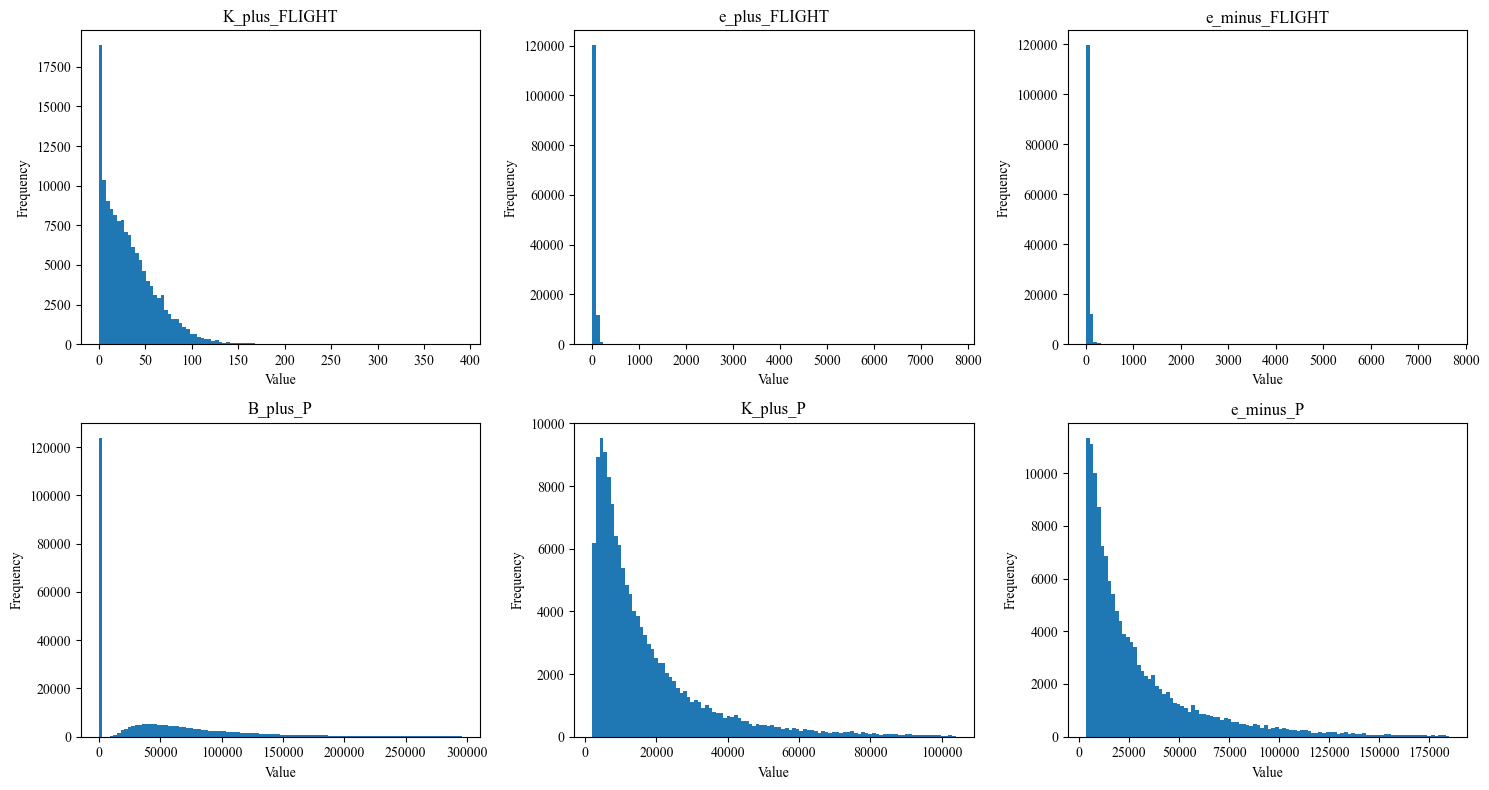

In [22]:
import uproot
import numpy as np

def plot_histograms(root_file_path, branch_names, bins=50, percentile_range=(1, 96), save_fig=False):
    """
    Plots histograms for a list of ROOT file branches with automatic range adjustment.

    Parameters:
    - root_file_path (str): Path to the ROOT file.
    - branch_names (list): List of branches to plot.
    - bins (int): Number of bins in the histogram (default=50).
    - percentile_range (tuple): Percentiles to determine histogram range (default=(1,99)).
    - save_fig (bool): If True, saves the figure as a PNG.
    """
    # Open the ROOT file
    with uproot.open(root_file_path) as file:
        # Find the first TTree in the file
        tree_name = None
        for key in file.keys():
            if isinstance(file[key], uproot.behaviors.TTree.TTree):
                tree_name = key
                break

        if tree_name is None:
            print("No TTree found in the file.")
            return

        # Load the tree
        tree = file[tree_name]

        # Check which branches are available
        available_branches = tree.keys()
        valid_branches = [b for b in branch_names if b in available_branches]

        if not valid_branches:
            print("No valid branches found in the ROOT file.")
            return

        # Determine grid layout for plots
        num_plots = len(valid_branches)
        cols = 3  # Number of columns in the grid
        rows = (num_plots // cols) + (num_plots % cols > 0)

        # Create figure
        fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
        axes = axes.flatten()  # Flatten in case of 2D array

        for i, branch in enumerate(valid_branches):
            # Load branch data
            data = tree[branch].array(library="np")

            # Remove NaNs and infinite values (to avoid plotting issues)
            data = data[np.isfinite(data)]

            if len(data) == 0:
                print(f"Skipping {branch} (empty or all NaNs)")
                continue

            # Compute percentile-based limits to remove extreme outliers
            lower_bound, upper_bound = np.percentile(data, percentile_range)

            # Plot histogram with adjusted limits
            axes[i].hist(data, bins=bins, range=(lower_bound, upper_bound))
            axes[i].set_title(branch)
            axes[i].set_xlabel("Value")
            axes[i].set_ylabel("Frequency")

        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()

        # Save figure if required
        if save_fig:
            plt.savefig("rawconditions.png", dpi=300)
            print("Saved histogram plot as 'hrawconditions.png'")

        plt.show()

# Example usage
root_file_path = "/users/zw21147/ResearchProject/datasets/split/inferencetest.root"
branch_names = [
	"K_plus_FLIGHT",
	"e_plus_FLIGHT",
	"e_minus_FLIGHT",

    "B_plus_P", "K_plus_P",
     "e_minus_P",
    
]  # Define branches to plot

plot_histograms(root_file_path, branch_names, bins=100, percentile_range=(1, 99), save_fig=False)


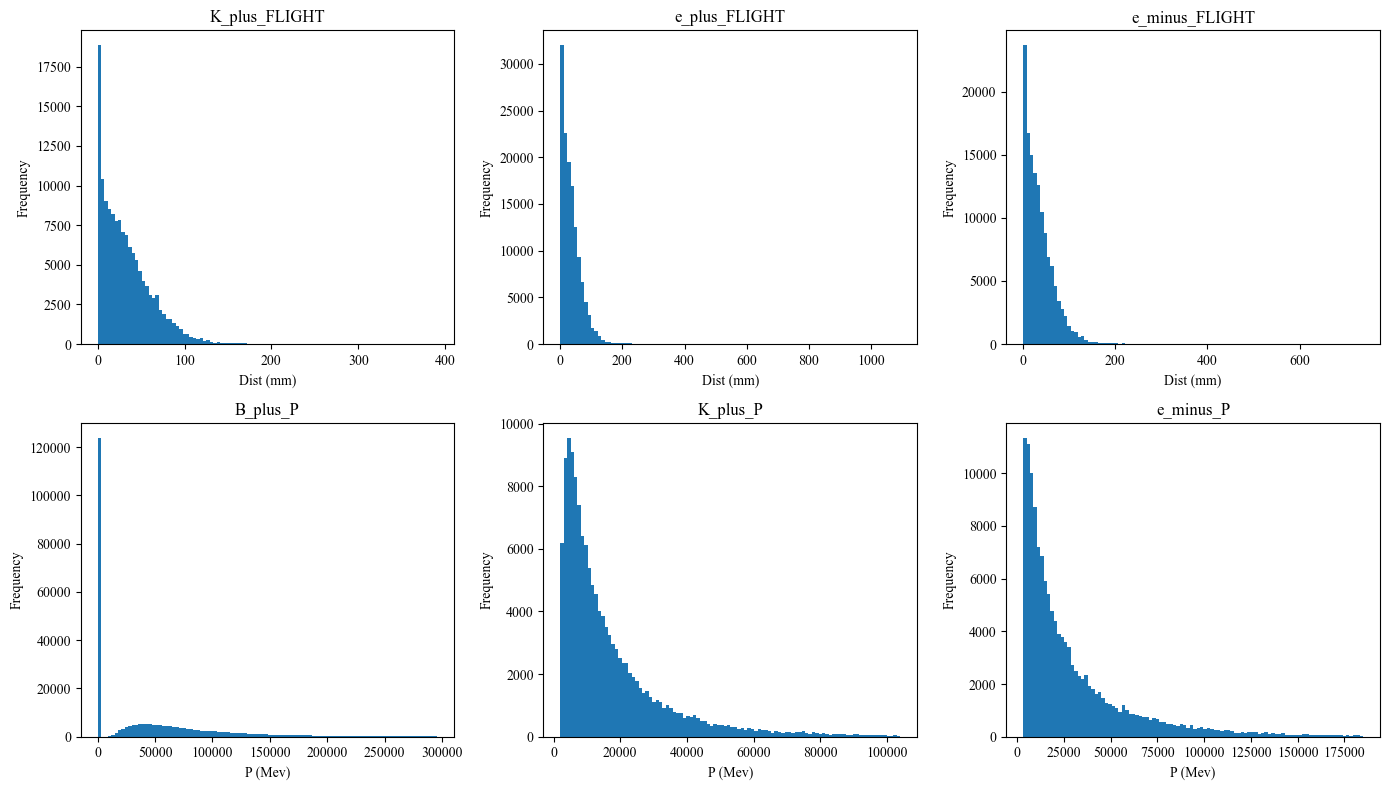

In [27]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# Path to your ROOT file
root_file_path = "/users/zw21147/ResearchProject/datasets/split/inferencetest.root"

# Open the file and find the first TTree
with uproot.open(root_file_path) as f:
    tree_key = None
    for key in f.keys():
        if isinstance(f[key], uproot.behaviors.TTree.TTree):
            tree_key = key
            break
    tree = f[tree_key]

    # Load arrays (adjust or remove percentile/bins as desired)
    K_plus_FLIGHT = tree["K_plus_FLIGHT"].array(library="np")
    e_plus_FLIGHT = tree["e_plus_FLIGHT"].array(library="np")
    e_minus_FLIGHT = tree["e_minus_FLIGHT"].array(library="np")

    B_plus_P = tree["B_plus_P"].array(library="np")
    K_plus_P = tree["K_plus_P"].array(library="np")
    e_minus_P = tree["e_minus_P"].array(library="np")

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# 1) K_plus_FLIGHT
data = K_plus_FLIGHT[np.isfinite(K_plus_FLIGHT)]
low, high = np.percentile(data, [1, 99])
axes[0, 0].hist(data, bins=100, range=(low, high))
axes[0, 0].set_title("K_plus_FLIGHT")
axes[0, 0].set_xlabel("Dist (mm)")
axes[0, 0].set_ylabel("Frequency")

# 2) e_plus_FLIGHT
data = e_plus_FLIGHT[np.isfinite(e_plus_FLIGHT)]
low, high = np.percentile(data, [1, 96.5])
axes[0, 1].hist(data, bins=100, range=(low, high))
axes[0, 1].set_title("e_plus_FLIGHT")
axes[0, 1].set_xlabel("Dist (mm)")
axes[0, 1].set_ylabel("Frequency")

# 3) e_minus_FLIGHT
data = e_minus_FLIGHT[np.isfinite(e_minus_FLIGHT)]
low, high = np.percentile(data, [1, 96.5])
axes[0, 2].hist(data, bins=100, range=(low, high))
axes[0, 2].set_title("e_minus_FLIGHT")
axes[0, 2].set_xlabel("Dist (mm)")
axes[0, 2].set_ylabel("Frequency")

# 4) B_plus_P
data = B_plus_P[np.isfinite(B_plus_P)]
low, high = np.percentile(data, [1, 99])
axes[1, 0].hist(data, bins=100, range=(low, high))
axes[1, 0].set_title("B_plus_P")
axes[1, 0].set_xlabel("P (Mev)")
axes[1, 0].set_ylabel("Frequency")

# 5) K_plus_P
data = K_plus_P[np.isfinite(K_plus_P)]
low, high = np.percentile(data, [1, 99])
axes[1, 1].hist(data, bins=100, range=(low, high))
axes[1, 1].set_title("K_plus_P")
axes[1, 1].set_xlabel("P (Mev)")
axes[1, 1].set_ylabel("Frequency")

# 6) e_minus_P
data = e_minus_P[np.isfinite(e_minus_P)]
low, high = np.percentile(data, [1, 99])
axes[1, 2].hist(data, bins=100, range=(low, high))
axes[1, 2].set_title("e_minus_P")
axes[1, 2].set_xlabel("P (Mev)")
axes[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

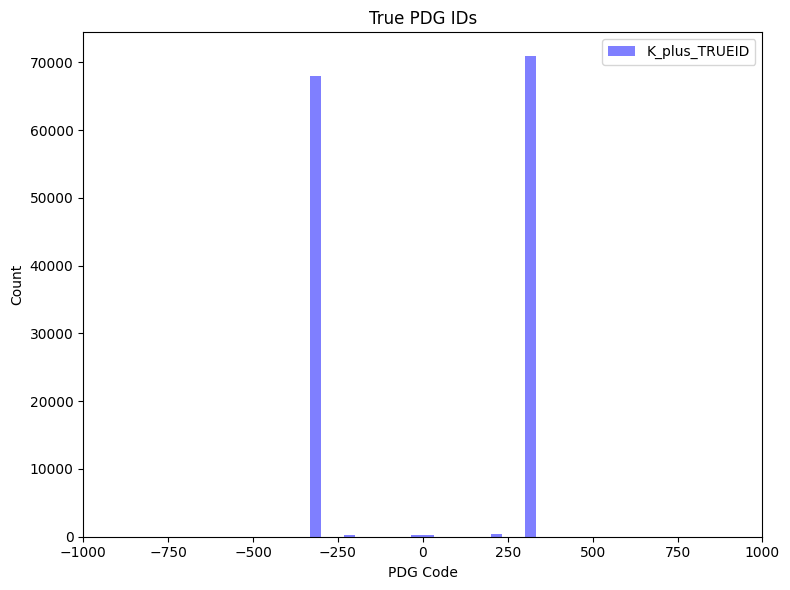

In [7]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

file_path = "/users/zw21147/ResearchProject/datasets/combinatorial_select_Kuu.root"
with uproot.open(file_path) as f:
    tree = f["DecayTree"]
    df = tree.arrays(library="pd")

K_plus_ID = df["DAUGHTER1_TRUEID"]
e_plus_ID = df["DAUGHTER2_TRUEID"]
e_minus_ID = df["DAUGHTER3_TRUEID"]

plt.figure(figsize=(8, 6))

bins = 300
pdg_range = (-5000, 5000)

plt.hist(K_plus_ID, bins=bins, range=pdg_range, alpha=0.5, color="blue", label="K_plus_TRUEID")
# plt.hist(e_plus_ID, bins=bins, range=pdg_range, alpha=0.5,  color="red", label="e_plus_TRUEID")
# plt.hist(e_minus_ID, bins=bins, range=pdg_range, alpha=0.5, color="green", label="e_minus_TRUEID")

plt.title("True PDG IDs")
plt.xlabel("PDG Code")
plt.ylabel("Count")
plt.legend(loc="upper right")
plt.xlim(-1000, 1000)  # sets x-axis from -1000 to +1000

plt.tight_layout()
plt.show()


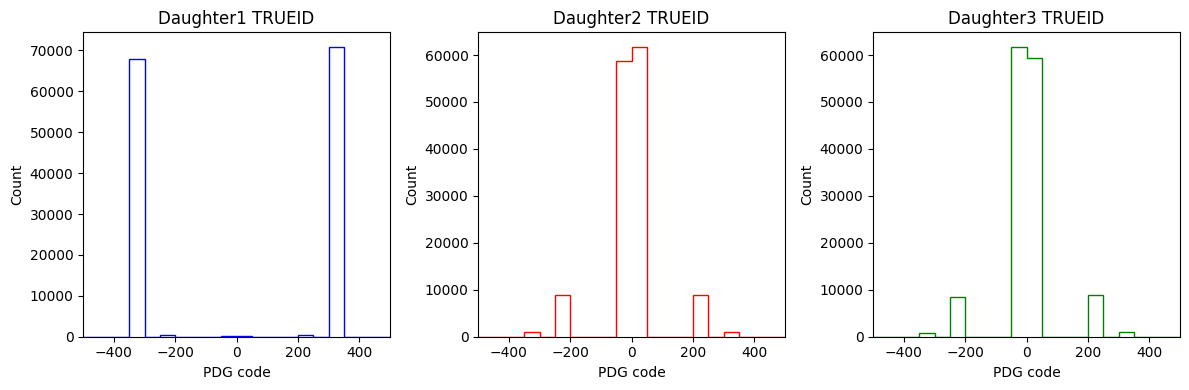

In [15]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

# 1) Open the ROOT file and load the TTree as a Pandas DataFrame
file_path = "/users/zw21147/ResearchProject/datasets/split/inferencetest.root"
with uproot.open(file_path) as f:
    tree = f["DecayTree"]
    df = tree.arrays(library="pd")

# 2) Extract the relevant TRUEID columns
K_plus_ID = df["K_plus_TRUEID"]
e_plus_ID = df["e_plus_TRUEID"]
e_minus_ID = df["e_minus_TRUEID"]

# 3) Plot each ID distribution in subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

axes[0].hist(K_plus_ID, bins=200, range=(-5000, 5000), histtype="step", edgecolor="blue")
axes[0].set_title("Daughter1 TRUEID")
axes[0].set_xlabel("PDG code")
axes[0].set_ylabel("Count")

axes[1].hist(e_plus_ID, bins=200, range=(-5000, 5000), histtype="step", edgecolor="red")
axes[1].set_title("Daughter2 TRUEID")
axes[1].set_xlabel("PDG code")
axes[1].set_ylabel("Count")

axes[2].hist(e_minus_ID, bins=200, range=(-5000, 5000), histtype="step", edgecolor="green")
axes[2].set_title("Daughter3 TRUEID")
axes[2].set_xlabel("PDG code")
axes[2].set_ylabel("Count")

axes[0].set_xlim(-500,500)
axes[1].set_xlim(-500,500)
axes[2].set_xlim(-500,500)
plt.show()


In [15]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak

# Define the renaming dictionary
rename_dict = {
    "MOTHER": "B_plus",
    "DAUGHTER1": "K_plus",
    "DAUGHTER2": "e_plus",
    "DAUGHTER3": "e_minus",
    "INTERMEDIATE": "J_psi_1S",
}

def compute_momentum_and_angles(root_file_path, output_root_file):
    # Open the ROOT file
    with uproot.open(root_file_path) as file:
        # Find the first TTree
        tree_name = None
        for key in file.keys():
            if isinstance(file[key], uproot.behaviors.TTree.TTree):
                tree_name = key
                break

        if tree_name is None:
            print("No TTree found in the file.")
            return
        
        # Load tree into a Pandas DataFrame
        tree = file[tree_name]
        df = tree.arrays(library="pd")

        # Compute PT, P, and angles for each particle (renaming included)
        for old_name, new_name in rename_dict.items():
            px_col = f"{old_name}_PX"
            py_col = f"{old_name}_PY"
            pz_col = f"{old_name}_PZ"
            pt_col = f"{new_name}_PT"
            p_col = f"{new_name}_P"
            angle_col = f"angle_{new_name}"

            # Compute PT
            if px_col in df.columns and py_col in df.columns:
                df[pt_col] = np.sqrt(df[px_col]**2 + df[py_col]**2)

            # Compute P
            if px_col in df.columns and py_col in df.columns and pz_col in df.columns:
                df[p_col] = np.sqrt(df[px_col]**2 + df[py_col]**2 + df[pz_col]**2)

            # Compute angles (only for daughter particles)
            if old_name.startswith("DAUGHTER") and p_col in df.columns:
                df[angle_col] = np.arccos(df[pz_col] / df[p_col])  # Polar angle (θ)

        # Rename columns according to the mapping
        new_columns = {}
        for col in df.columns:
            for old_name, new_name in rename_dict.items():
                if col.startswith(old_name):
                    new_columns[col] = col.replace(old_name, new_name)

        df = df.rename(columns=new_columns)

        # Identify and remove jagged columns
        jagged_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (list, ak.highlevel.Array))]
        if jagged_cols:
            print(f"Removing jagged columns: {jagged_cols}")
            df = df.drop(columns=jagged_cols)

        # Convert DataFrame to dictionary of numpy arrays
        numpy_dict = {col: np.array(df[col]) for col in df.columns}
        tree_name = 'DecayTree'

        # Save to new ROOT file
        with uproot.recreate(output_root_file) as new_file:
            new_file[tree_name] = numpy_dict

        print(f"Updated ROOT file saved as {output_root_file}")

# Specify the ROOT file paths
input_root_file = "/users/zw21147/ResearchProject/datasets/split/combinatorial_select_Kuu_renamed.root"
output_root_file = "/users/zw21147/ResearchProject/datasets/split/inferencetest.root"

# Run the function
compute_momentum_and_angles(input_root_file, output_root_file)


Removing jagged columns: ['B_plus_ENDVERTEX_COV_', 'B_plus_OWNPV_COV_', 'J_psi_1S_ENDVERTEX_COV_']
Updated ROOT file saved as /users/zw21147/ResearchProject/datasets/split/inferencetest.root


In [17]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak

# Define renaming dictionary
rename_dict = {
    "MOTHER": "B_plus",
    "DAUGHTER1": "K_plus",
    "DAUGHTER2": "e_plus",
    "DAUGHTER3": "e_minus",
    "INTERMEDIATE": "J_psi_1S",
}

def mag(vector):
    """Compute magnitude of a vector."""
    return np.sqrt(np.sum(vector**2, axis=0))

def dot(vec1, vec2):
    """Compute dot product of two vectors."""
    return np.sum(vec1 * vec2, axis=0)

def compute_angle(df, mother, particle, true_vars=True):
    """Compute angle between mother and particle momentum vectors."""
    if true_vars:
        momenta_B = np.array([
            df[f"{mother}_TRUEP_X"], df[f"{mother}_TRUEP_Y"], df[f"{mother}_TRUEP_Z"]
        ])
        momenta_i = np.array([
            df[f"{particle}_TRUEP_X"], df[f"{particle}_TRUEP_Y"], df[f"{particle}_TRUEP_Z"]
        ])
    else:
        momenta_B = np.array([
            df[f"{mother}_PX"], df[f"{mother}_PY"], df[f"{mother}_PZ"]
        ])
        momenta_i = np.array([
            df[f"{particle}_PX"], df[f"{particle}_PY"], df[f"{particle}_PZ"]
        ])
    
    epsilon = 1e-10  # Small number to prevent division by zero

    # Compute magnitudes
    mag_B = mag(momenta_B)
    mag_i = mag(momenta_i)

    # Avoid division by zero
    denominator = np.maximum(mag_B * mag_i, epsilon)

    # Compute dot product safely
    cos_theta = np.clip(dot(momenta_B, momenta_i) / denominator, -1.0, 1.0)

    # Compute angle in radians
    angle = np.arccos(cos_theta)

    # Handle NaN values
    angle[np.isnan(angle)] = 1e-6
    angle[angle == 0] = 1e-6

    return angle

def compute_momentum_and_angles(root_file_path, output_root_file):
    """Compute PT, P, and angles, then save to a new ROOT file."""
    with uproot.open(root_file_path) as file:
        # Find first TTree
        tree_name = None
        for key in file.keys():
            if isinstance(file[key], uproot.behaviors.TTree.TTree):
                tree_name = key
                break

        if tree_name is None:
            print("No TTree found in the file.")
            return
        
        # Load tree into a Pandas DataFrame
        tree = file[tree_name]
        df = tree.arrays(library="pd")

        # Compute PT and P for each particle
        for old_name, new_name in rename_dict.items():
            px_col = f"{old_name}_PX"
            py_col = f"{old_name}_PY"
            pz_col = f"{old_name}_PZ"
            pt_col = f"{new_name}_PT"
            p_col = f"{new_name}_P"

            # Compute PT
            if px_col in df.columns and py_col in df.columns:
                df[pt_col] = np.sqrt(df[px_col]**2 + df[py_col]**2)

            # Compute P
            if px_col in df.columns and py_col in df.columns and pz_col in df.columns:
                df[p_col] = np.sqrt(df[px_col]**2 + df[py_col]**2 + df[pz_col]**2)

        # Compute angles between B_plus and each daughter particle
        for daughter in ["K_plus", "e_plus", "e_minus"]:
            if all(f"{rename_dict['MOTHER']}_PX" in df.columns for col in ["PX", "PY", "PZ"]) and \
               all(f"{daughter}_PX" in df.columns for col in ["PX", "PY", "PZ"]):
                df[f"angle_{daughter}"] = compute_angle(df, rename_dict["MOTHER"], daughter, true_vars=False)

        # Rename columns according to the mapping
        new_columns = {}
        for col in df.columns:
            for old_name, new_name in rename_dict.items():
                if col.startswith(old_name):
                    new_columns[col] = col.replace(old_name, new_name)

        df = df.rename(columns=new_columns)

        # Identify and remove jagged columns
        jagged_cols = [col for col in df.columns if isinstance(df[col].iloc[0], (list, ak.highlevel.Array))]
        if jagged_cols:
            print(f"Removing jagged columns: {jagged_cols}")
            df = df.drop(columns=jagged_cols)

        # Convert DataFrame to dictionary of numpy arrays
        numpy_dict = {col: np.array(df[col]) for col in df.columns}
        tree_name = 'DecayTree'

        # Save to new ROOT file
        with uproot.recreate(output_root_file) as new_file:
            new_file[tree_name] = numpy_dict

        print(f"Updated ROOT file saved as {output_root_file}")

# Specify ROOT file paths
input_root_file = "/users/zw21147/ResearchProject/datasets/split/combinatorial_select_Kuu_renamed.root"
output_root_file = "/users/zw21147/ResearchProject/datasets/split/inferencetest.root"

# Run function
compute_momentum_and_angles(input_root_file, output_root_file)


Removing jagged columns: ['B_plus_ENDVERTEX_COV_', 'B_plus_OWNPV_COV_', 'J_psi_1S_ENDVERTEX_COV_']
Updated ROOT file saved as /users/zw21147/ResearchProject/datasets/split/inferencetest.root
